In [1]:
import CactusTool

name = 'BBH002'
Level = ['Lev1', 'Lev2']
n = len(Level)

mp = []
bbh = []
for l in Level:
    sim = CactusTool.load(name+l, '/Volumes/simulations/BBH_Catalog/')
    mp.append(sim.ThornOutput('multipole'))
    bbh.append(sim.ThornOutput('TwoPunctures'))


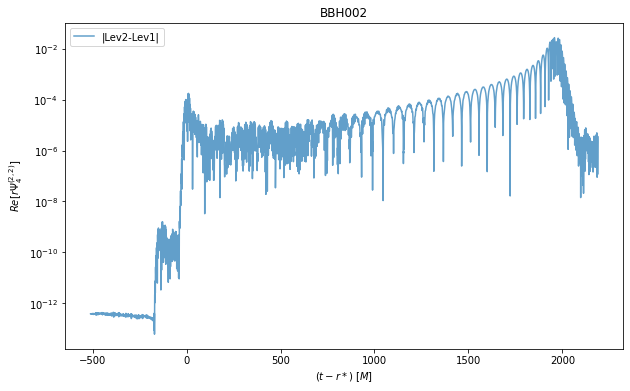

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rPsi4 = []
for i in range(n):
    rPsi4.append(mp[i].rPsi4(bbh[i].ADMMass, (2,2), 500))

tstart = max([v.tstart for v in rPsi4])
tend = min([v.tend for v in rPsi4])
dt = min([v.dt for v in rPsi4])
t = np.arange(tstart, tend, dt)
rpsi4 = [v.resample(t).real.y for v in rPsi4]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.xlabel(r'$(t-r*)~[M]$')
plt.ylabel(r'$Re[r\Psi_{4}^{(2,2)}]$')

for i in range(n-1):
    plt.plot(t, np.abs(rpsi4[i+1]-rpsi4[i]), alpha = 0.7, label='|{}-{}|'.format(Level[i+1], Level[i]))

# plt.plot(t, 2.75 * np.abs(rpsi4[3]-rpsi4[2]), ':', alpha = 0.7,label='2.75|{}-{}|'.format(Level[1], Level[0]))

ax.set_yscale('log')
# plt.ylim(1e-6,1e-2)
# plt.xlim(0,1500)
plt.legend()
plt.title(name)

plt.show()

In [3]:
h_low = 1.2/2**6
h_med = 1.0666666666666667/2**6
h_high = 0.96/2**6
Q = 8
factor = (h_low**Q - h_med**Q) / (h_med**Q - h_high**Q)
factor

2.749243838884759

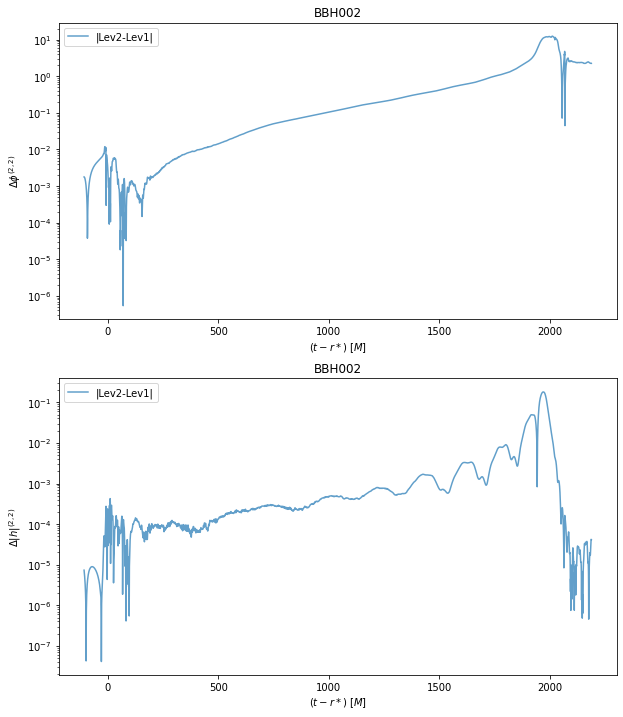

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Strain = []
for i in range(n):
    Strain.append(mp[i].Strain(bbh[i].ADMMass, bbh[i].CutoffFrequency, (2,2), -1))

tstart = max([v.tstart for v in Strain])
tend = min([v.tend for v in Strain])
dt = min([v.dt for v in Strain])
t = np.arange(tstart, tend, dt)

phase = [v.phase.resample(t).y for v in Strain]
amp = [v.absolute.resample(t).y for v in Strain]

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(211)
ax.set_xlabel(r'$(t-r*)~[M]$')
ax.set_ylabel(r'$\Delta \phi^{(2,2)}$')
ax.set_yscale('log')

for i in range(n-1):
    plt.plot(t, np.abs(phase[i+1]-phase[i]), alpha = 0.7, label='|{}-{}|'.format(Level[i+1], Level[i]))

# plt.plot(t, 2.75 * np.abs(phase[3]-phase[2]), ':', alpha = 0.7,label='2.75|{}-{}|'.format(Level[1], Level[0]))

plt.legend()
plt.title(name)

ax = fig.add_subplot(212)
ax.set_xlabel(r'$(t-r*)~[M]$')
ax.set_ylabel(r'$\Delta |h|^{(2,2)}$')
ax.set_yscale('log')

for i in range(n-1):
    plt.plot(t, np.abs(amp[i+1]-amp[i]), alpha = 0.7, label='|{}-{}|'.format(Level[i+1], Level[i]))

# plt.plot(t, 2.75 * np.abs(amp[3]-amp[2]), ':', alpha = 0.7,label='2.75|{}-{}|'.format(Level[1], Level[0]))

plt.legend()
plt.title(name)

plt.show()

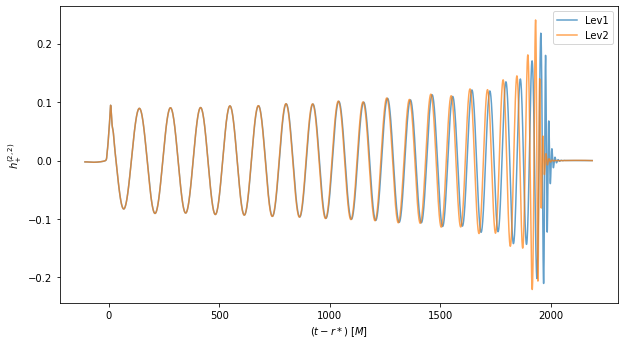

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(211)
ax.set_xlabel(r'$(t-r*)~[M]$')
ax.set_ylabel(r'$h^{(2,2)}_{+}$')

for i in range(n):
    Strain = mp[i].Strain(bbh[i].ADMMass, bbh[i].CutoffFrequency, (2,2), -1).real
    plt.plot(Strain.t, Strain.y, alpha = 0.7, label='{}'.format(Level[i]))
    
plt.legend()